In [1]:
import sys
sys.path.insert(0, '/home/niell_lab/Documents/github/FreelyMovingEphys/')
import pandas as pd
import numpy as np
from population_utils import *

In [2]:
from pylab import *

In [3]:
df = pd.read_pickle('/home/niell_lab/data/freely_moving_ephys/batch_files/082321/pooled_ephys_unit_update_082321.pickle')

In [4]:
df1 = make_population_summary(df, '/home/niell_lab/Desktop')

opening pdf
labeling by waveform
kmeans
pca
depth plot
panels of osi vs variable
panels of dsi vs variable
depth vs variables
clustering waveforms
plotting clusters
relabeling based on peak finding
plotting histograms of cluster depths
plotting boxplots of cluster properties
matrix of cluster changes between movement types
clustering waveforms
plotting clusters
relabeling based on peak finding
plotting histograms of cluster depths
plotting boxplots of cluster properties
matrix of cluster changes between movement types
firing rate by stim
getting fm active times and comparing spike rates
dhead and deye around time of gaze shifting eye movements


100%|███████████████████████████████████████████| 12/12 [00:18<00:00,  1.53s/it]


dhead and deye around time of compesatory eye movements


100%|███████████████████████████████████████████| 12/12 [00:22<00:00,  1.89s/it]


dhead and deye around time of gaze shifting head movements


100%|███████████████████████████████████████████| 12/12 [00:30<00:00,  2.50s/it]


dhead and deye around time of compensatory head movements


100%|███████████████████████████████████████████| 12/12 [00:24<00:00,  2.06s/it]


saving population summary pdf
done


In [5]:
example128ch =  df1[df1['session']=='070921_J553RT_control_Rig2']

In [6]:
matplotlib.rcParams.update({'font.size': 18})

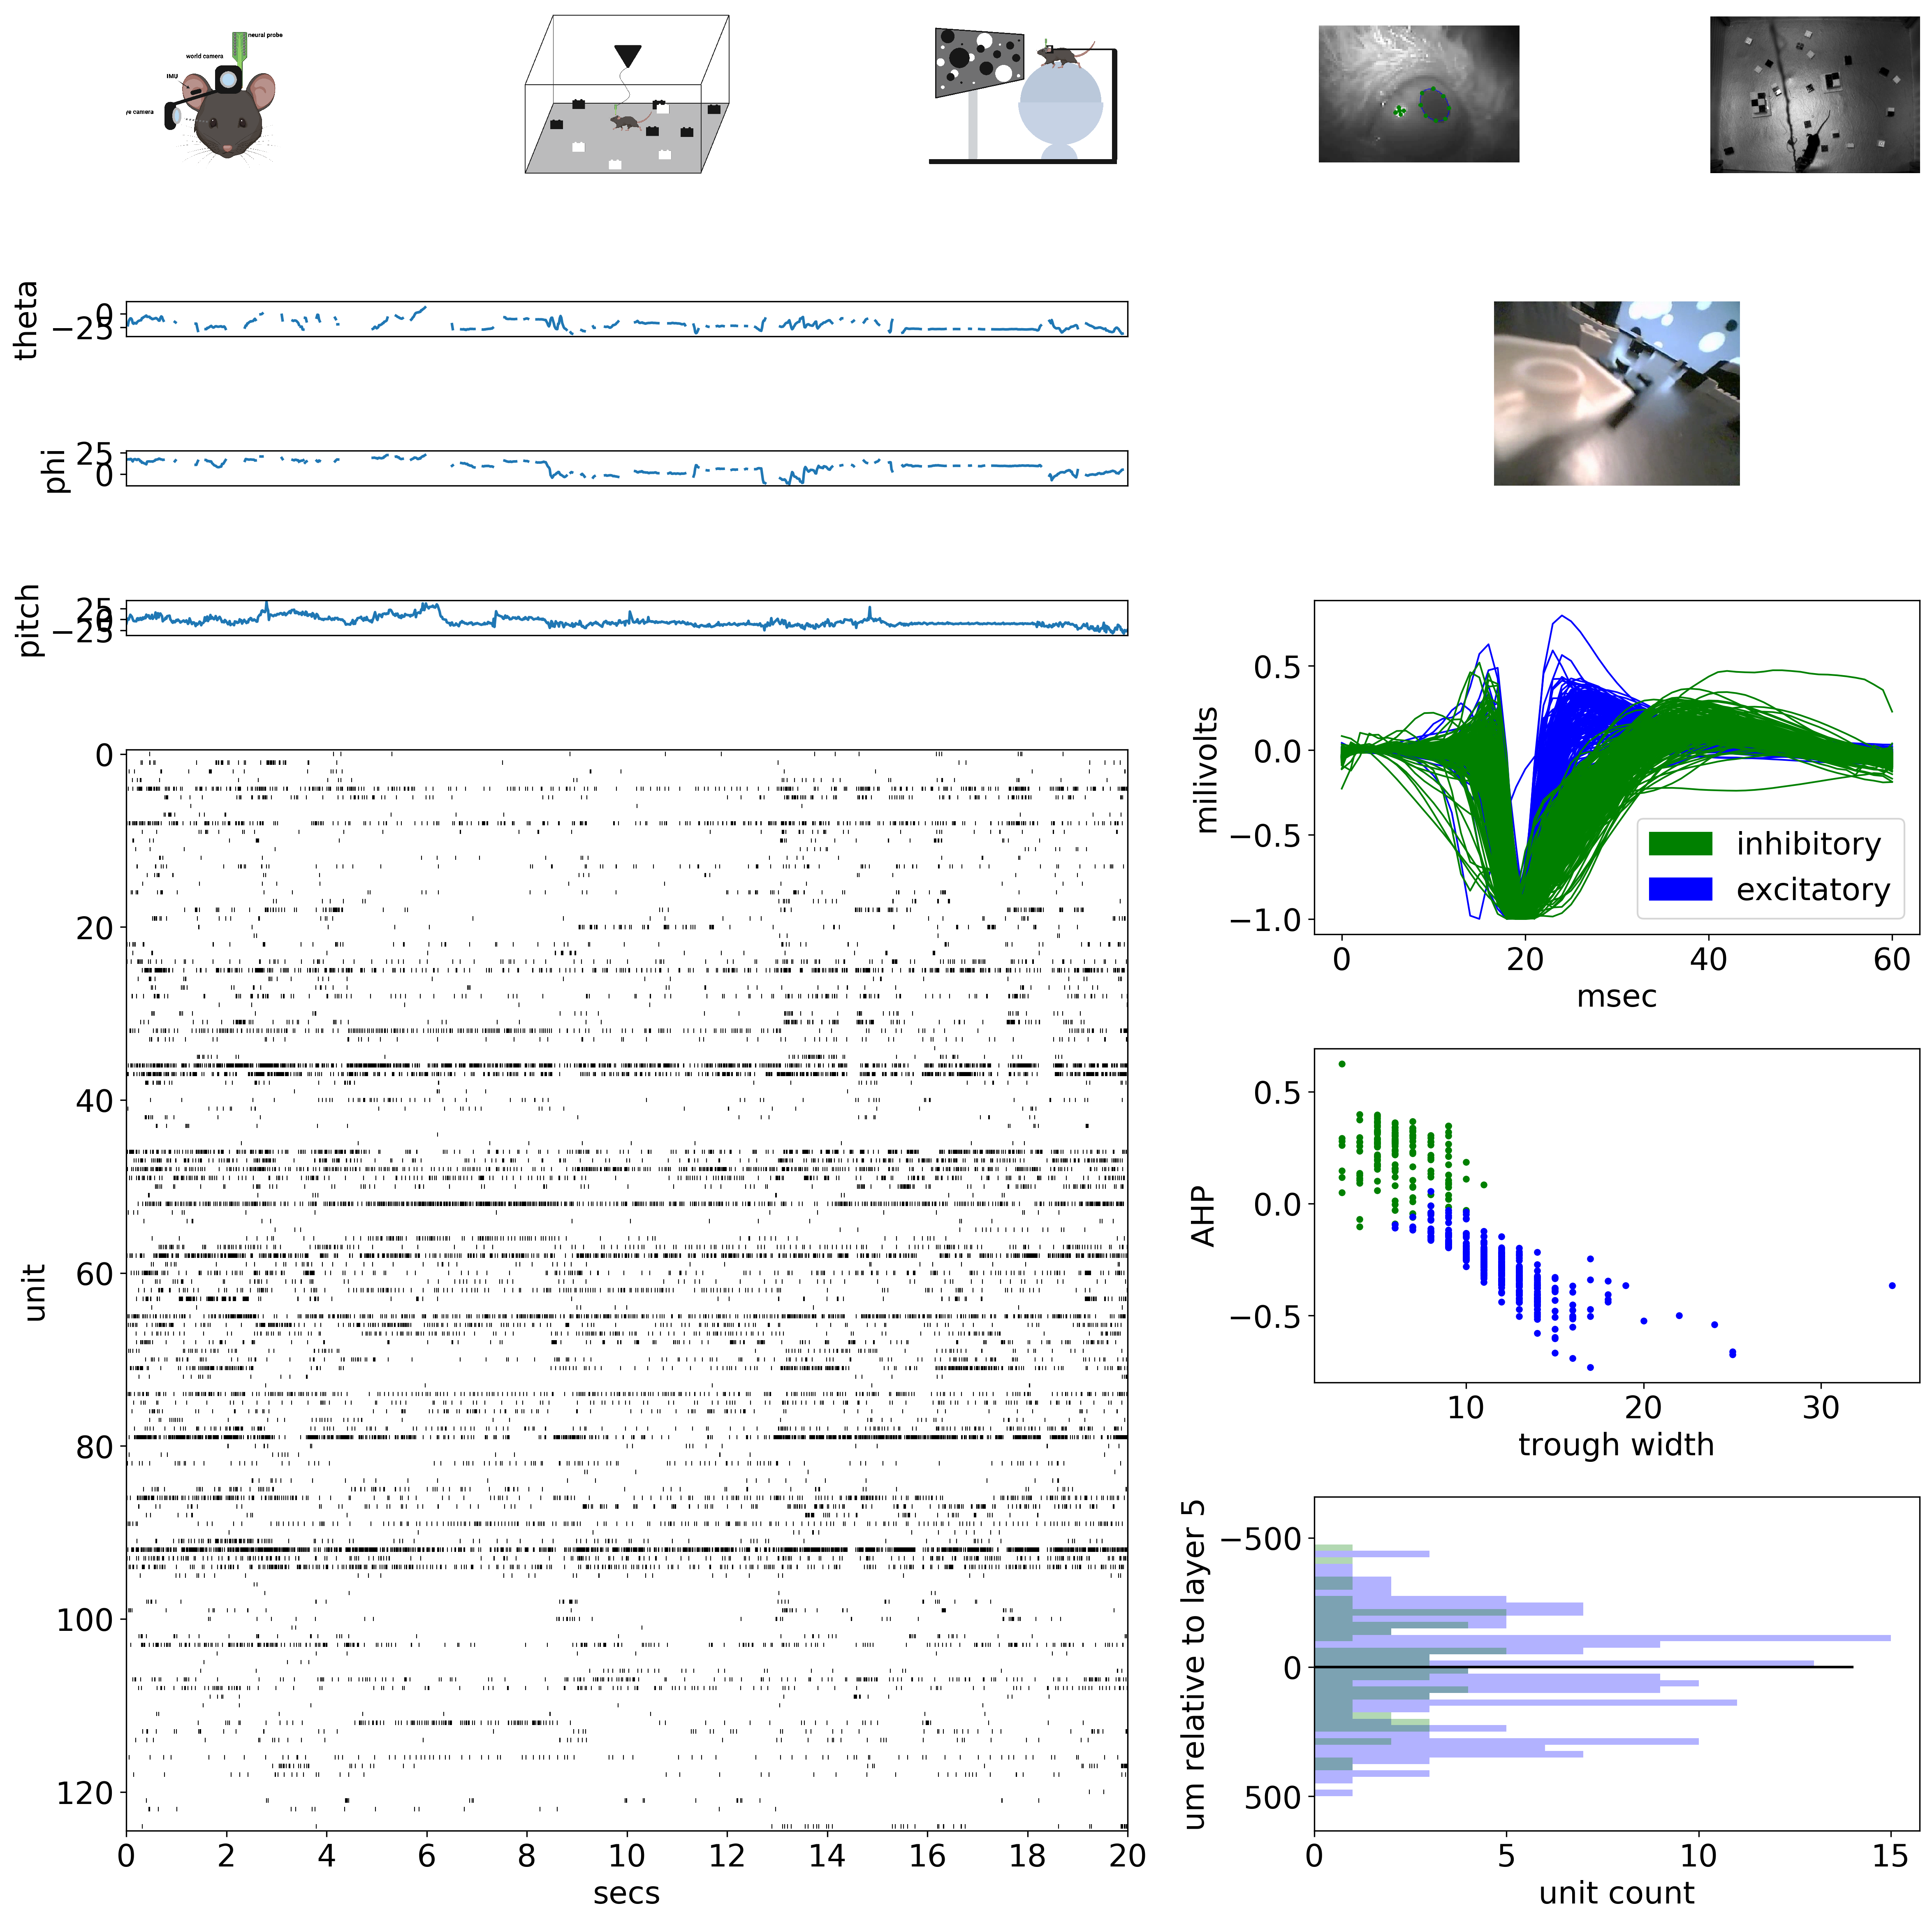

In [7]:
start = 18
rangeT = np.arange(start,start+(60*20))

fig1 = plt.figure(constrained_layout=True, figsize=(16,16), dpi=300)
gs = fig1.add_gridspec(13,10)
eyecam = fig1.add_subplot(gs[0:2,0:2])
# eyecam.text(0.01, 0.01, 'A', size=25)
eyecam.imshow(plt.imread('/home/niell_lab/Documents/figures/paper_imgs/gear_text.png')[300:-300,500:-500,:])
plt.axis('off')
hf_stim = fig1.add_subplot(gs[0:2,4:6])
# hf_stim.text(0.01, 0.01, 'C', size=25)
hf_stim.imshow(plt.imread('/home/niell_lab/Documents/figures/paper_imgs/hf.png'))
plt.axis('off')
fm_stim = fig1.add_subplot(gs[0:2,2:4])
fm_stim.imshow(plt.imread('/home/niell_lab/Documents/figures/paper_imgs/fm.png'))
plt.axis('off')
# fm_stim.text(0.01, 0.01, 'B', size=25)
th = fig1.add_subplot(gs[2,0:6])
th.plot(example128ch['fm1_eyeT'].iloc[0][rangeT], example128ch['fm1_theta'].iloc[0][rangeT])
th.get_xaxis().set_visible(False)
th.set_xlim([0,20])
# th.text(0.01, 0.01, 'D', size=25)
plt.ylabel('theta')
phi = fig1.add_subplot(gs[3,0:6])
phi.plot(example128ch['fm1_eyeT'].iloc[0][rangeT], example128ch['fm1_phi'].iloc[0][rangeT])
phi.get_xaxis().set_visible(False)
# phi.text(0.01, 0.01, 'E', size=25)
phi.set_xlim([0,20])
phi.set_ylabel('phi')
gz = fig1.add_subplot(gs[4,0:6])
gz.plot(example128ch['fm1_eyeT'].iloc[0][rangeT], example128ch['fm1_pitch_interp'].iloc[0][rangeT])
gz.get_xaxis().set_visible(False)
gz.set_xlim([0,20])
gz.set_ylabel('pitch')
# gz.text(0.01, 0.01, 'F', size=25)
raster = fig1.add_subplot(gs[5:13,0:6])
# raster.text(0.01, 0.01, 'G', size=25)
sh_num = 4
sh0 = np.arange(0,len(example128ch.index)+sh_num,sh_num)
full_raster = np.array([]).astype(int)
for sh in range(sh_num):
    full_raster = np.concatenate([full_raster, sh0+sh])
for i, ind in enumerate(example128ch.index):
    i = full_raster[i]
    raster.vlines(example128ch.at[ind,'fm1_spikeT'],i-0.25,i+0.25,'k',linewidth=0.5)
raster.set_ylim(len(example128ch)+0.5,-.5)
raster.set_xlabel('secs')
raster.set_xlim([start,start+20])
raster.set_xticks(np.arange(18,39,2))
raster.set_xticklabels(np.arange(0,39-18,2))
raster.set_ylabel('unit')
# raster.spines['right'].set_visible(False)
# raster.spines['top'].set_visible(False)
# FIX RASTER XTICKS TO START AT ZERO
eye = fig1.add_subplot(gs[0:2,6:8])
eye.imshow(plt.imread('/home/niell_lab/Documents/figures/paper_imgs/eye_ellipse.png'))
plt.axis('off')
world = fig1.add_subplot(gs[2:4,6:10])
world.imshow(plt.imread('/home/niell_lab/Documents/figures/paper_imgs/world_frame.png'))
plt.axis('off')
topdown = fig1.add_subplot(gs[0:2,8:10])
topdown.imshow(plt.imread('/home/niell_lab/Documents/figures/paper_imgs/topdown_frame.png'))
plt.axis('off')
wv = fig1.add_subplot(gs[4:7,6:10])
# wv.text(0.01, 0.01, 'H', size=25)
for ind, row in df1['norm_waveform'][df1['waveform_km_label']==0].iteritems():
    wv.plot(row, 'b', linewidth=1)
for ind, row in df1['norm_waveform'][df1['waveform_km_label']==1].iteritems():
    wv.plot(row, 'g', linewidth=1)
bluepatch = mpatches.Patch(color='g', label='inhibitory')
greenpatch = mpatches.Patch(color='b', label='excitatory')
wv.legend(handles=[bluepatch, greenpatch])
wv.set_ylabel('milivolts'); wv.set_xlabel('msec')
wvprops = fig1.add_subplot(gs[7:10,6:10])
# wvprops.text(0.01, 0.01, 'I', size=25)
wvprops.plot(df1['waveform_trough_width'][df1['waveform_peak'] < 0][df1['waveform_km_label']==0], df1['AHP'][df1['waveform_peak'] < 0][df1['waveform_km_label']==0], 'g.')
wvprops.plot(df1['waveform_trough_width'][df1['waveform_peak'] < 0][df1['waveform_km_label']==1], df1['AHP'][df1['waveform_peak'] < 0][df1['waveform_km_label']==1], 'b.')
wvprops.set_ylabel('AHP'); wvprops.set_xlabel('trough width')
depth = fig1.add_subplot(gs[10:13,6:10])
# depth.text(0.01, 0.01, 'J', size=25)
depth.hist(df1['hf1_wn_depth_from_layer5'][df1['waveform_km_label']==1],color='b',bins=np.arange(-600,600,25),alpha=0.3,orientation='horizontal')
depth.hist(df1['hf1_wn_depth_from_layer5'][df1['waveform_km_label']==0],color='g',bins=np.arange(-600,600,25),alpha=0.3,orientation='horizontal')
depth.set_ylabel('um relative to layer 5'); depth.set_xlabel('unit count'); depth.invert_yaxis()
depth.plot([0,14],[0,0],'k')

plt.tight_layout()

In [ ]:
fig2 = plt.figure(constrained_layout=True, figsize=(16,16), dpi=300)
gs = fig1.add_gridspec(11,10)

# unit labels, as numbered in unit summary
unit_labels = [42,55,57,71,80,85,89,95,104]
lag_for_unit_labels = [3,2,2,2,2,2,2,2,2]
inds_dict = dict(zip(example128ch['index'].values, example128ch.index.values))
units = [inds_dict[i] for i in unit_labels]

gs0 = fig2.add_gridspec(11,10, wspace=0.05)

hfRF0 = fig2.add_subplot(gs0[0,0])
sta = np.reshape(example128ch.loc[units[0],'hf1_wn_spike_triggered_average'],tuple(example128ch.loc[units[0],'hf1_wn_sta_shape']))
starange = np.max(np.abs(sta))*1.2
hfRF0.imshow(sta, vmin=-starange, vmax=starange, cmap='seismic')
hfRF0.axis('off')
autoAxis = hfRF0.axis()
rec = Rectangle((autoAxis[0]-0.7,autoAxis[2]-0.2),(autoAxis[1]-autoAxis[0])+1,(autoAxis[3]-autoAxis[2])+0.4,fill=False,lw=3,color='tab:orange')
rec = hfRF0.add_patch(rec)
rec.set_clip_on(False)

hfRF1 = fig2.add_subplot(gs0[0,1])
sta = np.reshape(example128ch.loc[units[1],'hf1_wn_spike_triggered_average'],tuple(example128ch.loc[units[1],'hf1_wn_sta_shape']))
starange = np.max(np.abs(sta))*1.2
hfRF1.imshow(sta, vmin=-starange, vmax=starange, cmap='seismic')
hfRF1.axis('off')
autoAxis = hfRF1.axis()
rec = Rectangle((autoAxis[0]-0.7,autoAxis[2]-0.2),(autoAxis[1]-autoAxis[0])+1,(autoAxis[3]-autoAxis[2])+0.4,fill=False,lw=3,color='tab:purple')
rec = hfRF1.add_patch(rec)
rec.set_clip_on(False)

hfRF2 = fig2.add_subplot(gs0[0,2])
sta = np.reshape(example128ch.loc[units[2],'hf1_wn_spike_triggered_average'],tuple(example128ch.loc[units[2],'hf1_wn_sta_shape']))
starange = np.max(np.abs(sta))*1.2
hfRF2.imshow(sta, vmin=-starange, vmax=starange, cmap='seismic')
hfRF2.axis('off')
autoAxis = hfRF2.axis()
rec = Rectangle((autoAxis[0]-0.7,autoAxis[2]-0.2),(autoAxis[1]-autoAxis[0])+1,(autoAxis[3]-autoAxis[2])+0.4,fill=False,lw=3,color='tab:green')
rec = hfRF2.add_patch(rec)
rec.set_clip_on(False)

hfRF3 = fig2.add_subplot(gs0[1,0])
sta = np.reshape(example128ch.loc[units[3],'hf1_wn_spike_triggered_average'],tuple(example128ch.loc[units[3],'hf1_wn_sta_shape']))
starange = np.max(np.abs(sta))*1.2
hfRF3.imshow(sta, vmin=-starange, vmax=starange, cmap='seismic')
hfRF3.axis('off')
autoAxis = hfRF3.axis()
rec = Rectangle((autoAxis[0]-0.7,autoAxis[2]-0.2),(autoAxis[1]-autoAxis[0])+1,(autoAxis[3]-autoAxis[2])+0.4,fill=False,lw=3,color='tab:brown')
rec = hfRF3.add_patch(rec)
rec.set_clip_on(False)

hfRF4 = fig2.add_subplot(gs0[1,1])
sta = np.reshape(example128ch.loc[units[4],'hf1_wn_spike_triggered_average'],tuple(example128ch.loc[units[4],'hf1_wn_sta_shape']))
starange = np.max(np.abs(sta))*1.2
hfRF4.imshow(sta, vmin=-starange, vmax=starange, cmap='seismic')
hfRF4.axis('off')
autoAxis = hfRF4.axis()
rec = Rectangle((autoAxis[0]-0.7,autoAxis[2]-0.2),(autoAxis[1]-autoAxis[0])+1,(autoAxis[3]-autoAxis[2])+0.4,fill=False,lw=3,color='tab:pink')
rec = hfRF4.add_patch(rec)
rec.set_clip_on(False)

hfRF5 = fig2.add_subplot(gs0[1,2])
sta = np.reshape(example128ch.loc[units[5],'hf1_wn_spike_triggered_average'],tuple(example128ch.loc[units[5],'hf1_wn_sta_shape']))
starange = np.max(np.abs(sta))*1.2
hfRF5.imshow(sta, vmin=-starange, vmax=starange, cmap='seismic')
hfRF5.axis('off')
autoAxis = hfRF5.axis()
rec = Rectangle((autoAxis[0]-0.7,autoAxis[2]-0.2),(autoAxis[1]-autoAxis[0])+1,(autoAxis[3]-autoAxis[2])+0.4,fill=False,lw=3,color='gold')
rec = hfRF5.add_patch(rec)
rec.set_clip_on(False)

hfRF6 = fig2.add_subplot(gs0[2,0])
sta = np.reshape(example128ch.loc[units[6],'hf1_wn_spike_triggered_average'],tuple(example128ch.loc[units[6],'hf1_wn_sta_shape']))
starange = np.max(np.abs(sta))*1.2
hfRF6.imshow(sta, vmin=-starange, vmax=starange, cmap='seismic')
hfRF6.axis('off')
autoAxis = hfRF6.axis()
rec = Rectangle((autoAxis[0]-0.7,autoAxis[2]-0.2),(autoAxis[1]-autoAxis[0])+1,(autoAxis[3]-autoAxis[2])+0.4,fill=False,lw=3,color='cadetblue')
rec = hfRF6.add_patch(rec)
rec.set_clip_on(False)

hfRF7 = fig2.add_subplot(gs0[2,1])
sta = np.reshape(example128ch.loc[units[7],'hf1_wn_spike_triggered_average'],tuple(example128ch.loc[units[7],'hf1_wn_sta_shape']))
starange = np.max(np.abs(sta))*1.2
hfRF7.imshow(sta, vmin=-starange, vmax=starange, cmap='seismic')
hfRF7.axis('off')
autoAxis = hfRF7.axis()
rec = Rectangle((autoAxis[0]-0.7,autoAxis[2]-0.2),(autoAxis[1]-autoAxis[0])+1,(autoAxis[3]-autoAxis[2])+0.4,fill=False,lw=3,color='aqua')
rec = hfRF7.add_patch(rec)
rec.set_clip_on(False)

hfRF8 = fig2.add_subplot(gs0[2,2])
sta = np.reshape(example128ch.loc[units[8],'hf1_wn_spike_triggered_average'],tuple(example128ch.loc[units[8],'hf1_wn_sta_shape']))
starange = np.max(np.abs(sta))*1.2
hfRF8.imshow(sta, vmin=-starange, vmax=starange, cmap='seismic')
hfRF8.axis('off')
autoAxis = hfRF8.axis()
rec = Rectangle((autoAxis[0]-0.7,autoAxis[2]-0.2),(autoAxis[1]-autoAxis[0])+1,(autoAxis[3]-autoAxis[2])+0.4,fill=False,lw=3,color='lime')
rec = hfRF8.add_patch(rec)
rec.set_clip_on(False)

#  freely moving
fmRF0 = fig2.add_subplot(gs0[0,3])
glm = df1.loc[units[0], 'fm1_glm_receptive_field'][lag_for_unit_labels[0]]
crange = np.max(np.abs(glm))*1.2
fmRF0.imshow(glm, vmin=-crange, vmax=crange, cmap='seismic')
fmRF0.axis('off')
autoAxis = fmRF0.axis()
rec = Rectangle((autoAxis[0]-0.7,autoAxis[2]-0.2),(autoAxis[1]-autoAxis[0])+1,(autoAxis[3]-autoAxis[2])+0.4,fill=False,lw=3,color='tab:orange')
rec = fmRF0.add_patch(rec)
rec.set_clip_on(False)

fmRF1 = fig2.add_subplot(gs0[0,4])
glm = df1.loc[units[1], 'fm1_glm_receptive_field'][lag_for_unit_labels[0]]
crange = np.max(np.abs(glm))*1.2
fmRF1.imshow(glm, vmin=-crange, vmax=crange, cmap='seismic')
fmRF1.axis('off')
autoAxis = fmRF1.axis()
rec = Rectangle((autoAxis[0]-0.7,autoAxis[2]-0.2),(autoAxis[1]-autoAxis[0])+1,(autoAxis[3]-autoAxis[2])+0.4,fill=False,lw=3,color='tab:purple')
rec = fmRF1.add_patch(rec)
rec.set_clip_on(False)

fmRF2 = fig2.add_subplot(gs0[0,5])
glm = df1.loc[units[2], 'fm1_glm_receptive_field'][lag_for_unit_labels[0]]
crange = np.max(np.abs(glm))*1.2
fmRF2.imshow(glm, vmin=-crange, vmax=crange, cmap='seismic')
fmRF2.axis('off')
autoAxis = fmRF2.axis()
rec = Rectangle((autoAxis[0]-0.7,autoAxis[2]-0.2),(autoAxis[1]-autoAxis[0])+1,(autoAxis[3]-autoAxis[2])+0.4,fill=False,lw=3,color='tab:green')
rec = fmRF2.add_patch(rec)
rec.set_clip_on(False)

fmRF3 = fig2.add_subplot(gs0[1,3])
glm = df1.loc[units[3], 'fm1_glm_receptive_field'][lag_for_unit_labels[0]]
crange = np.max(np.abs(glm))*1.2
fmRF3.imshow(glm, vmin=-crange, vmax=crange, cmap='seismic')
fmRF3.axis('off')
autoAxis = fmRF3.axis()
rec = Rectangle((autoAxis[0]-0.7,autoAxis[2]-0.2),(autoAxis[1]-autoAxis[0])+1,(autoAxis[3]-autoAxis[2])+0.4,fill=False,lw=3,color='tab:brown')
rec = fmRF3.add_patch(rec)
rec.set_clip_on(False)

fmRF4 = fig2.add_subplot(gs0[1,4])
glm = df1.loc[units[4], 'fm1_glm_receptive_field'][lag_for_unit_labels[0]]
crange = np.max(np.abs(glm))*1.2
fmRF4.imshow(glm, vmin=-crange, vmax=crange, cmap='seismic')
fmRF4.axis('off')
autoAxis = fmRF4.axis()
rec = Rectangle((autoAxis[0]-0.7,autoAxis[2]-0.2),(autoAxis[1]-autoAxis[0])+1,(autoAxis[3]-autoAxis[2])+0.4,fill=False,lw=3,color='tab:pink')
rec = fmRF4.add_patch(rec)
rec.set_clip_on(False)

fmRF5 = fig2.add_subplot(gs0[1,5])
glm = df1.loc[units[5], 'fm1_glm_receptive_field'][lag_for_unit_labels[0]]
crange = np.max(np.abs(glm))*1.2
fmRF5.imshow(glm, vmin=-crange, vmax=crange, cmap='seismic')
fmRF5.axis('off')
autoAxis = fmRF5.axis()
rec = Rectangle((autoAxis[0]-0.7,autoAxis[2]-0.2),(autoAxis[1]-autoAxis[0])+1,(autoAxis[3]-autoAxis[2])+0.4,fill=False,lw=3,color='gold')
rec = fmRF5.add_patch(rec)
rec.set_clip_on(False)

fmRF6 = fig2.add_subplot(gs0[2,3])
glm = df1.loc[units[6], 'fm1_glm_receptive_field'][lag_for_unit_labels[0]]
crange = np.max(np.abs(glm))*1.2
fmRF6.imshow(glm, vmin=-crange, vmax=crange, cmap='seismic')
fmRF6.axis('off')
autoAxis = fmRF6.axis()
rec = Rectangle((autoAxis[0]-0.7,autoAxis[2]-0.2),(autoAxis[1]-autoAxis[0])+1,(autoAxis[3]-autoAxis[2])+0.4,fill=False,lw=3,color='cadetblue')
rec = fmRF6.add_patch(rec)
rec.set_clip_on(False)

fmRF7 = fig2.add_subplot(gs0[2,4])
glm = df1.loc[units[7], 'fm1_glm_receptive_field'][lag_for_unit_labels[0]]
crange = np.max(np.abs(glm))*1.2
fmRF7.imshow(glm, vmin=-crange, vmax=crange, cmap='seismic')
fmRF7.axis('off')
autoAxis = fmRF7.axis()
rec = Rectangle((autoAxis[0]-0.7,autoAxis[2]-0.2),(autoAxis[1]-autoAxis[0])+1,(autoAxis[3]-autoAxis[2])+0.4,fill=False,lw=3,color='aqua')
rec = fmRF7.add_patch(rec)
rec.set_clip_on(False)

fmRF8 = fig2.add_subplot(gs0[2,5])
glm = df1.loc[units[8], 'fm1_glm_receptive_field'][lag_for_unit_labels[0]]
crange = np.max(np.abs(glm))*1.2
fmRF8.imshow(glm, vmin=-crange, vmax=crange, cmap='seismic')
fmRF8.axis('off')
autoAxis = fmRF8.axis()
rec = Rectangle((autoAxis[0]-0.7,autoAxis[2]-0.2),(autoAxis[1]-autoAxis[0])+1,(autoAxis[3]-autoAxis[2])+0.4,fill=False,lw=3,color='lime')
rec = fmRF8.add_patch(rec)
rec.set_clip_on(False)

#####
lfp_power_profile = example128ch['hf1_wn_lfp_power_profiles'].iloc[0]
layer5_cent = example128ch['hf1_wn_lfp_layer5_centers'].iloc[0]
ch_spacing = 25 # in um

depth_sh0 = fig2.add_subplot(gs[0:2,6])
norm_profile_sh0 = lfp_power_profile[0]
layer5_cent_sh0 = layer5_cent[0]
depth_sh0.plot(norm_profile_sh0,range(0,32))
depth_sh0.hlines(layer5_cent_sh0, 0, norm_profile_sh0[layer5_cent_sh0], 'r')
depth_sh0.set_ylim([33,-1])
depth_sh0.set_yticks(ticks=list(range(-1,33)))
depth_sh0.set_yticklabels((ch_spacing*np.arange(34)-(layer5_cent_sh0*ch_spacing)))
depth_sh0.get_xaxis().set_visible(False)

depth_sh1 = fig2.add_subplot(gs[0:2,7])
norm_profile_sh1 = lfp_power_profile[1]
layer5_cent_sh1 = layer5_cent[1]
depth_sh1.plot(norm_profile_sh1,range(0,32))
depth_sh1.hlines(layer5_cent_sh1, 0, norm_profile_sh1[layer5_cent_sh1], 'r')
depth_sh1.set_ylim([33,-1])
depth_sh1.set_yticks(ticks=list(range(-1,33)))
depth_sh1.set_yticks((ch_spacing*np.arange(34)-(layer5_cent_sh1*ch_spacing)))
depth_sh1.get_xaxis().set_visible(False)

depth_sh2 = fig2.add_subplot(gs[0:2,8])
norm_profile_sh2 = lfp_power_profile[2]
layer5_cent_sh2 = layer5_cent[2]
depth_sh2.plot(norm_profile_sh2,range(0,32))
depth_sh2.hlines(layer5_cent_sh2, 0, norm_profile_sh2[layer5_cent_sh2], 'r')
depth_sh2.set_ylim([33,-1])
depth_sh2.set_yticks(ticks=list(range(-1,33)))
depth_sh2.set_yticklabels((ch_spacing*np.arange(34)-(layer5_cent_sh2*ch_spacing)))
depth_sh2.get_xaxis().set_visible(False)

depth_sh3 = fig2.add_subplot(gs[0:2,9])
norm_profile_sh3 = lfp_power_profile[3]
layer5_cent_sh3 = layer5_cent[3]
depth_sh3.plot(norm_profile_sh3,range(0,32))
depth_sh3.hlines(layer5_cent_sh3, 0, norm_profile_sh3[layer5_cent_sh3], 'r')
depth_sh3.set_ylim([33,-1])
depth_sh3.set_yticks(ticks=list(range(-1,33)))
depth_sh3.set_yticklabels((ch_spacing*np.arange(34)-(layer5_cent_sh3*ch_spacing)))
depth_sh3.get_xaxis().set_visible(False)

colors = ['tab:orange','tab:purple','tab:green','tab:brown','tab:pink','gold','cadetblue','aqua','lime']
for i in range(len(units)):
    unit = units[i]
    if df1.loc[unit, 'sh'] == 0:
        ch = int(df1.loc[unit, 'ch'])
        ch_power = norm_profile_sh0[ch]
        depth_sh0.plot(ch_power, ch, '*', color=colors[i], markersize=12)
    elif df1.loc[unit, 'sh'] == 1:
        ch = int(df1.loc[unit, 'ch'])
        ch_power = norm_profile_sh1[ch]
        depth_sh1.plot(ch_power, ch, '*', color=colors[i], markersize=12)
    elif df1.loc[unit, 'sh'] == 2:
        ch = int(df1.loc[unit, 'ch'])
        ch_power = norm_profile_sh2[ch]
        depth_sh2.plot(ch_power, ch, '*', color=colors[i], markersize=12)
    elif df1.loc[unit, 'sh'] == 3:
        ch = int(df1.loc[unit, 'ch'])
        ch_power = norm_profile_sh3[ch]
        depth_sh3.plot(ch_power, ch, '*', color=colors[i], markersize=12)
        
crfs = fig2.add_subplot(gs[3:5,0:3])
for ind, row in example128ch.iterrows():
    crfs.errorbar(row['hf1_wn_crf_cent'],row['hf1_wn_crf_tuning'],yerr=row['hf1_wn_crf_err'], alpha=0.3, color='gray')
for i in range(len(units)):
    unit = units[i]
    row = example128ch.loc[unit]
    crfs.errorbar(row['hf1_wn_crf_cent'],row['hf1_wn_crf_tuning'],yerr=row['hf1_wn_crf_err'], color=colors[i])
crfs.set_ylabel('sp/sec'); crfs.set_xlabel('headfixed contrast')
crfs.set_ylim([0,40])

SRvsRoll = fig2.add_subplot(gs[2:4,6:8])
for ind, row in example128ch.iterrows():
    SRvsRoll.errorbar(row['fm1_spike_rate_vs_roll_cent'],row['fm1_spike_rate_vs_roll_tuning'],yerr=row['fm1_spike_rate_vs_roll_err'], alpha=0.3, color='gray')
for i in range(len(units)):
    unit = units[i]
    row = example128ch.loc[unit]
    SRvsRoll.errorbar(row['fm1_spike_rate_vs_roll_cent'],row['fm1_spike_rate_vs_roll_tuning'],yerr=row['fm1_spike_rate_vs_roll_err'], color=colors[i])
SRvsRoll.set_ylabel('sp/sec'); SRvsRoll.set_xlabel('head roll (deg)')
SRvsRoll.set_ylim([0,40])

SRvsPitch = fig2.add_subplot(gs[2:4,8:10])
for ind, row in example128ch.iterrows():
    SRvsPitch.errorbar(row['fm1_spike_rate_vs_pitch_cent'],row['fm1_spike_rate_vs_pitch_tuning'],yerr=row['fm1_spike_rate_vs_pitch_err'], alpha=0.3, color='gray')
for i in range(len(units)):
    unit = units[i]
    row = example128ch.loc[unit]
    SRvsPitch.errorbar(row['fm1_spike_rate_vs_pitch_cent'],row['fm1_spike_rate_vs_pitch_tuning'],yerr=row['fm1_spike_rate_vs_pitch_err'], color=colors[i])
SRvsPitch.set_ylabel('sp/sec'); SRvsPitch.set_xlabel('head pitch (deg)')
SRvsPitch.set_ylim([0,40])

SRvsGy = fig2.add_subplot(gs[4:6,6:8])
for ind, row in example128ch.iterrows():
    SRvsGy.errorbar(row['fm1_spike_rate_vs_gy_cent'],row['fm1_spike_rate_vs_gy_tuning'],yerr=row['fm1_spike_rate_vs_gy_err'], alpha=0.3, color='gray')
for i in range(len(units)):
    unit = units[i]
    row = example128ch.loc[unit]
    SRvsGy.errorbar(row['fm1_spike_rate_vs_gy_cent'],row['fm1_spike_rate_vs_gy_tuning'],yerr=row['fm1_spike_rate_vs_gy_err'], color=colors[i])
SRvsGy.set_ylabel('sp/sec'); SRvsGy.set_xlabel('gyro y (deg)')
SRvsGy.set_ylim([0,40])

SRvsGz = fig2.add_subplot(gs[4:6,8:10])
for ind, row in example128ch.iterrows():
    SRvsGz.errorbar(row['fm1_spike_rate_vs_gz_cent'],row['fm1_spike_rate_vs_gz_tuning'],yerr=row['fm1_spike_rate_vs_gz_err'], alpha=0.3, color='gray')
for i in range(len(units)):
    unit = units[i]
    row = example128ch.loc[unit]
    SRvsGz.errorbar(row['fm1_spike_rate_vs_gz_cent'],row['fm1_spike_rate_vs_gz_tuning'],yerr=row['fm1_spike_rate_vs_gz_err'], color=colors[i])
SRvsGz.set_ylabel('sp/sec'); SRvsGz.set_xlabel('gyro z (deg)')
SRvsGz.set_ylim([0,40])